IMPORTAZIONE LIBRERIE

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

CAMBIO PATH PER ANALISI RISPETTO AL LOG DI VOLO CONSIDERATO

In [2]:
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

d:\GitHub\ProgettoManutenzionePreventiva\M1\FAULT_M1_5


VOLO M1 FAULT 5%

In [3]:
rcou_m1_fault5 = pd.read_csv("RCOU.csv")
rcou_m1_fault5 = rcou_m1_fault5.drop(['LineNo','C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8'], axis=1)

rcou_m1_fault5 = rcou_m1_fault5[((rcou_m1_fault5['C9'] >= 1400) & (rcou_m1_fault5['C10'] >= 1400) & (rcou_m1_fault5['C11'] >= 1400) & (rcou_m1_fault5['C12'] >= 1400) & (rcou_m1_fault5['C13'] >= 1400) & (rcou_m1_fault5['C14']>= 1400))]

pd.set_option('display.max_rows',700)
display(rcou_m1_fault5)

,TimeUS,C9,C10,C11,C12,C13,C14
6501,192587140,1412,1504,1504,1412,1456,1465
6502,192597516,1523,1403,1461,1472,1514,1414
6504,192618155,1546,1402,1436,1518,1504,1451
6505,192629042,1532,1433,1464,1504,1509,1459
6506,192639550,1527,1452,1484,1496,1517,1463
...,...,...,...,...,...,...,...
14821,284568994,1626,1408,1580,1467,1505,1546
14822,284579056,1623,1404,1545,1500,1468,1573
14823,284589530,1586,1441,1553,1480,1440,1586
14824,284599918,1557,1458,1561,1453,1425,1583


In [4]:
xkf1_m1_fault5 = pd.read_csv("XKF1_0.csv")
xkf1_m1_fault5 = xkf1_m1_fault5.drop(['LineNo','C','VN','VE','VD','dPD','PN','PE','PD','GX','GY','GZ','OH'], axis=1)
xkf1_m1_fault5 = xkf1_m1_fault5[((xkf1_m1_fault5['TimeUS'] >= 192587140) & (xkf1_m1_fault5['TimeUS'] <= 284612550))]
print(xkf1_m1_fault5)

          TimeUS  Roll  Pitch    Yaw
6504   192595222  1.22   0.09  19.61
6505   192605218  1.32   0.12  19.61
6506   192615996  1.29   0.15  19.61
6507   192626797  1.24   0.14  19.62
6508   192637378  1.23   0.12  19.62
...          ...   ...    ...    ...
14825  284566773  1.28   0.19  19.28
14826  284576961  1.35   0.18  19.19
14827  284586972  1.39   0.11  19.12
14828  284597792  1.44   0.02  19.05
14829  284610260  1.63  -0.17  18.93

[8326 rows x 4 columns]


In [5]:
att_m1_fault5 = pd.read_csv("ATT.csv")
att_m1_fault5 = att_m1_fault5.drop(['LineNo','ErrRP', 'ErrYaw', 'AEKF'], axis=1)
att_m1_fault5 = att_m1_fault5[((att_m1_fault5['TimeUS'] >= 192587140) & (att_m1_fault5['TimeUS'] <= 284612550))]
print(att_m1_fault5)

          TimeUS  DesRoll  Roll  DesPitch  Pitch  DesYaw    Yaw
6504   192596660    -0.04  1.22      0.01   0.09   19.50  19.61
6505   192607207    -0.02  1.32      0.00   0.12   19.50  19.61
6506   192617586    -0.01  1.29      0.00   0.15   19.50  19.61
6507   192628189     0.00  1.24      0.00   0.14   19.50  19.62
6508   192638708     0.01  1.23      0.00   0.12   19.50  19.62
...          ...      ...   ...       ...    ...     ...    ...
14830  284568350     4.72  1.28     -2.06   0.19   16.97  19.28
14831  284578343     4.71  1.35     -2.01   0.18   16.97  19.19
14832  284588791     4.69  1.39     -1.96   0.11   16.98  19.12
14833  284599135     4.67  1.44     -1.93   0.02   16.98  19.05
14834  284611707     4.66  1.63     -1.91  -0.17   16.98  18.93

[8331 rows x 7 columns]


In [6]:
att_m1_fault5 = pd.merge_asof(att_m1_fault5,xkf1_m1_fault5, on="TimeUS", by=["Roll","Pitch","Yaw"], tolerance=100000)
print(att_m1_fault5)

         TimeUS  DesRoll  Roll  DesPitch  Pitch  DesYaw    Yaw
0     192596660    -0.04  1.22      0.01   0.09   19.50  19.61
1     192607207    -0.02  1.32      0.00   0.12   19.50  19.61
2     192617586    -0.01  1.29      0.00   0.15   19.50  19.61
3     192628189     0.00  1.24      0.00   0.14   19.50  19.62
4     192638708     0.01  1.23      0.00   0.12   19.50  19.62
...         ...      ...   ...       ...    ...     ...    ...
8326  284568350     4.72  1.28     -2.06   0.19   16.97  19.28
8327  284578343     4.71  1.35     -2.01   0.18   16.97  19.19
8328  284588791     4.69  1.39     -1.96   0.11   16.98  19.12
8329  284599135     4.67  1.44     -1.93   0.02   16.98  19.05
8330  284611707     4.66  1.63     -1.91  -0.17   16.98  18.93

[8331 rows x 7 columns]


In [7]:
esc_0_m1_fault5 = pd.read_csv("ESC_0.csv")
esc_0_m1_fault5 = esc_0_m1_fault5.drop(['LineNo','Instance', 'RawRPM', 'Volt', 'Temp', 'CTot', 'MotTemp', 'Err'], axis=1)
esc_0_m1_fault5 = esc_0_m1_fault5[((esc_0_m1_fault5['TimeUS'] >= 192587140) & (esc_0_m1_fault5['TimeUS'] <= 284612550))]
print(esc_0_m1_fault5)

         TimeUS   RPM  Curr
484   192612722  4165  3.31
485   192844581  4740  4.10
486   192947503  5736  4.03
487   193056466  6223  3.52
488   193163762  6139  3.84
...         ...   ...   ...
1246  284121608  6119  3.89
1247  284220989  6226  3.85
1248  284333569  6141  4.00
1249  284444212  6116  3.61
1250  284552951  6168  3.39

[767 rows x 3 columns]


In [8]:
imu_2_m1_fault5 = pd.read_csv("IMU_2.csv")
imu_2_m1_fault5 = imu_2_m1_fault5.drop(['LineNo','I', 'EG', 'EA', 'T', 'GH', 'AH', 'GHz', 'AHz'], axis=1)
imu_2_m1_fault5 = imu_2_m1_fault5[((imu_2_m1_fault5['TimeUS'] >= 192587140) & (imu_2_m1_fault5['TimeUS'] <= 284612550))]
print(imu_2_m1_fault5)

          TimeUS      GyrX      GyrY      GyrZ      AccX      AccY       AccZ
25732  192589114 -0.211117  0.025207  0.011475 -0.186976 -0.192846 -10.137350
25733  192591625  0.099821  0.095934  0.002081 -0.203514 -0.214899  -9.982902
25734  192594526  0.195722  0.045351 -0.005243 -0.187521 -0.228367  -9.965014
25735  192596496 -0.070339 -0.047737 -0.002205 -0.190865 -0.188905 -10.091400
25736  192599546 -0.177986  0.015901  0.013372 -0.196611 -0.080671 -10.134050
...          ...       ...       ...       ...       ...       ...        ...
57373  284593970  0.259907 -0.198636 -0.122656 -0.002287  0.265491 -11.939520
57374  284596356  0.158154 -0.124800 -0.127751  0.132627  0.148764 -12.199270
57375  284598958  0.098933 -0.153223 -0.138708  0.238617 -0.011134 -12.169920
57376  284608781  0.144989 -0.223607 -0.138273  0.159941 -0.284778 -12.303610
57377  284611544  0.135807 -0.186823 -0.127937  0.030477 -0.284847 -12.342080

[31646 rows x 7 columns]


In [9]:
m1_fault5 = pd.merge_asof(att_m1_fault5, imu_2_m1_fault5, on="TimeUS",  tolerance= 100000)
print(m1_fault5)

         TimeUS  DesRoll  Roll  DesPitch  Pitch  DesYaw    Yaw      GyrX  \
0     192596660    -0.04  1.22      0.01   0.09   19.50  19.61 -0.070339   
1     192607207    -0.02  1.32      0.00   0.12   19.50  19.61  0.118610   
2     192617586    -0.01  1.29      0.00   0.15   19.50  19.61  0.072522   
3     192628189     0.00  1.24      0.00   0.14   19.50  19.62  0.014681   
4     192638708     0.01  1.23      0.00   0.12   19.50  19.62  0.011245   
...         ...      ...   ...       ...    ...     ...    ...       ...   
8326  284568350     4.72  1.28     -2.06   0.19   16.97  19.28  0.145244   
8327  284578343     4.71  1.35     -2.01   0.18   16.97  19.19  0.148275   
8328  284588791     4.69  1.39     -1.96   0.11   16.98  19.12  0.118448   
8329  284599135     4.67  1.44     -1.93   0.02   16.98  19.05  0.098933   
8330  284611707     4.66  1.63     -1.91  -0.17   16.98  18.93  0.135807   

          GyrY      GyrZ      AccX      AccY       AccZ  
0    -0.047737 -0.002205 -0.1

In [10]:
m1_fault5 = pd.merge_asof(esc_0_m1_fault5, m1_fault5, on="TimeUS",  tolerance= 100000)
print(m1_fault5)

        TimeUS   RPM  Curr  DesRoll  Roll  DesPitch  Pitch  DesYaw    Yaw  \
0    192612722  4165  3.31    -0.02  1.32      0.00   0.12   19.50  19.61   
1    192844581  4740  4.10    -0.42  1.00      0.08  -0.28   19.50  19.71   
2    192947503  5736  4.03    -0.58  0.81      0.04   0.26   19.50  20.14   
3    193056466  6223  3.52    -0.69  0.29      0.14   0.57   19.50  21.09   
4    193163762  6139  3.84    -0.77  0.04     -0.05   0.97   19.50  22.18   
..         ...   ...   ...      ...   ...       ...    ...     ...    ...   
762  284121608  6119  3.89     5.05  1.15     -2.35  -0.57   16.95  21.25   
763  284220989  6226  3.85     4.99  1.20     -2.34  -0.96   16.95  21.30   
764  284333569  6141  4.00     4.85  1.04     -2.46  -0.74   16.94  20.97   
765  284444212  6116  3.61     4.61  1.38     -2.36  -0.57   16.95  20.35   
766  284552951  6168  3.39     4.72  1.11     -2.16   0.30   16.96  19.49   

         GyrX      GyrY      GyrZ      AccX      AccY       AccZ  
0    0.1

In [11]:
m1_fault5["TimeUS"] = m1_fault5["TimeUS"] - m1_fault5.iloc[0]["TimeUS"]
m1_fault5["TimeUS"] = m1_fault5["TimeUS"].astype(int)
m1_fault5["Guasto"] = 1
print(m1_fault5)

       TimeUS   RPM  Curr  DesRoll  Roll  DesPitch  Pitch  DesYaw    Yaw  \
0           0  4165  3.31    -0.02  1.32      0.00   0.12   19.50  19.61   
1      231859  4740  4.10    -0.42  1.00      0.08  -0.28   19.50  19.71   
2      334781  5736  4.03    -0.58  0.81      0.04   0.26   19.50  20.14   
3      443744  6223  3.52    -0.69  0.29      0.14   0.57   19.50  21.09   
4      551040  6139  3.84    -0.77  0.04     -0.05   0.97   19.50  22.18   
..        ...   ...   ...      ...   ...       ...    ...     ...    ...   
762  91508886  6119  3.89     5.05  1.15     -2.35  -0.57   16.95  21.25   
763  91608267  6226  3.85     4.99  1.20     -2.34  -0.96   16.95  21.30   
764  91720847  6141  4.00     4.85  1.04     -2.46  -0.74   16.94  20.97   
765  91831490  6116  3.61     4.61  1.38     -2.36  -0.57   16.95  20.35   
766  91940229  6168  3.39     4.72  1.11     -2.16   0.30   16.96  19.49   

         GyrX      GyrY      GyrZ      AccX      AccY       AccZ  Guasto  
0    0.11861

In [12]:
path_file = path_file.replace(r"M1\FAULT_M1_5", "")
os.chdir(path_file)
m1_fault5.to_csv('m1_fault5.csv', index=False)
print(path_file)

d:\GitHub\ProgettoManutenzionePreventiva\


## Analisi nel tempo e in frequenza

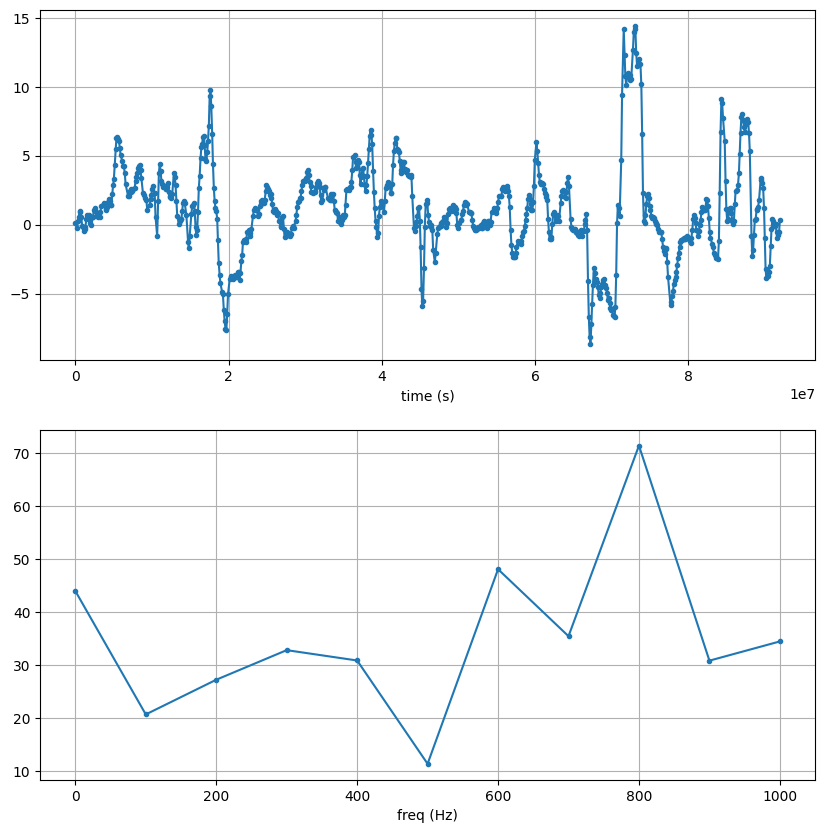

In [13]:
t = m1_fault5["TimeUS"]
y = m1_fault5["Pitch"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

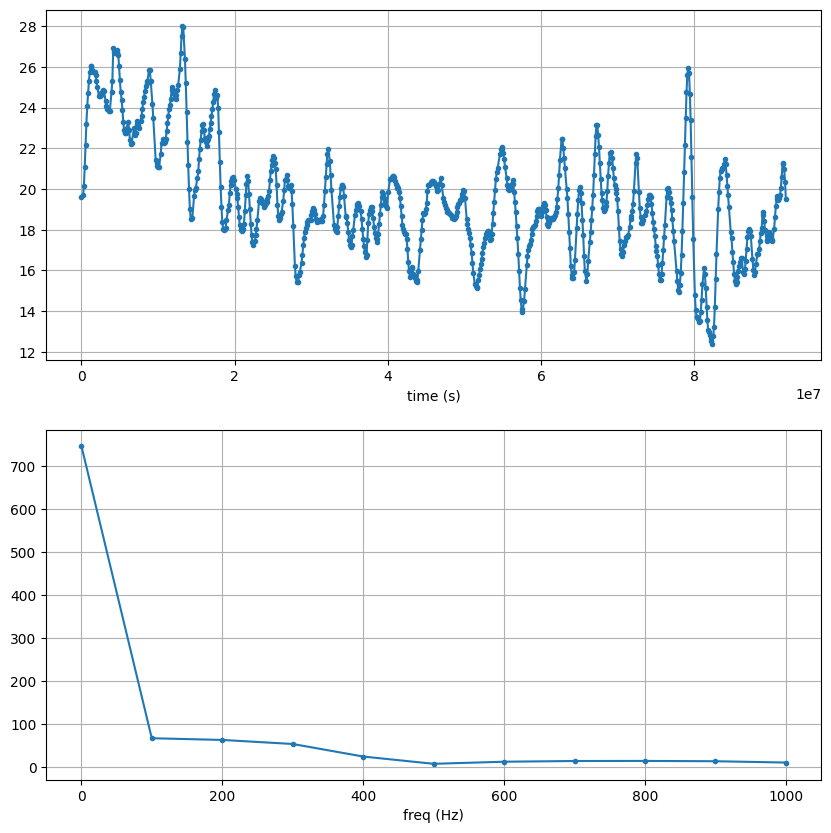

In [14]:
t = m1_fault5["TimeUS"]
y = m1_fault5["Yaw"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

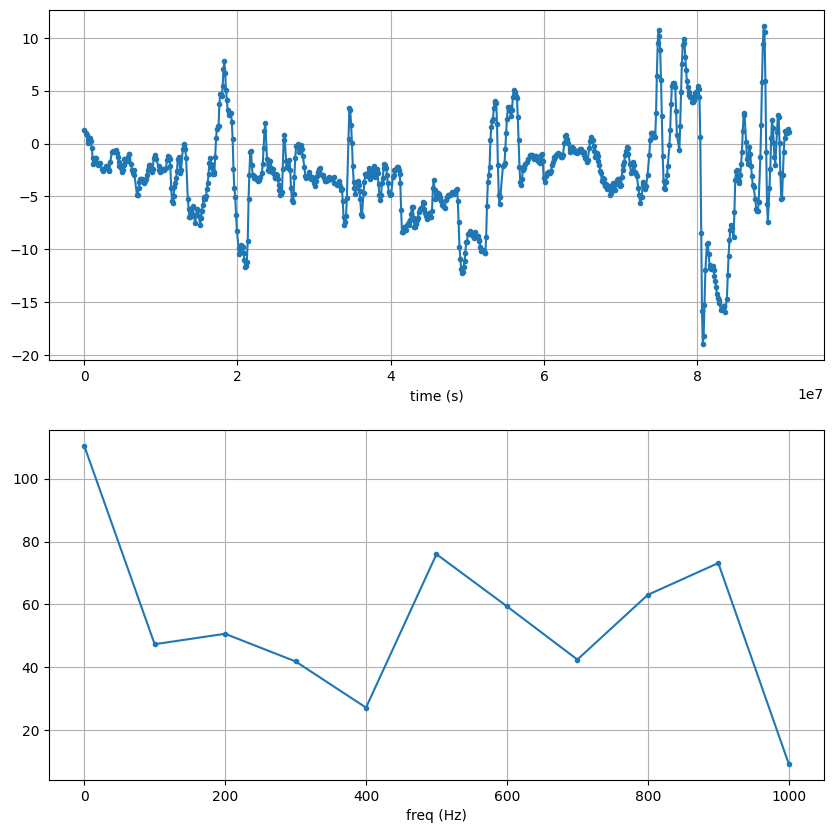

In [15]:
t = m1_fault5["TimeUS"]
y = m1_fault5["Roll"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()


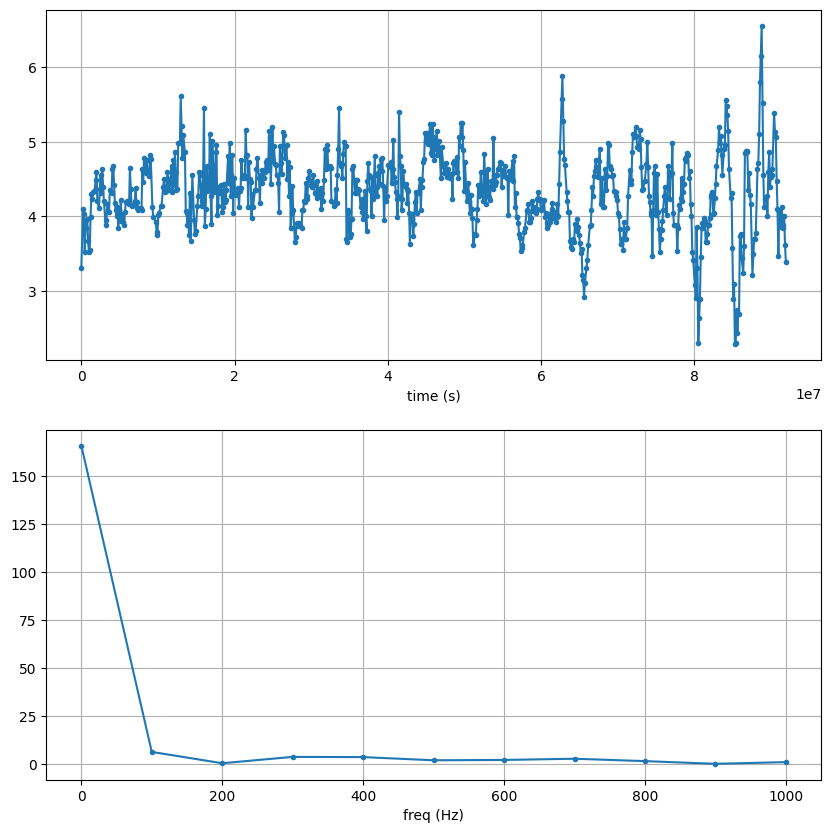

In [16]:
t = m1_fault5["TimeUS"]
y = m1_fault5["Curr"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()


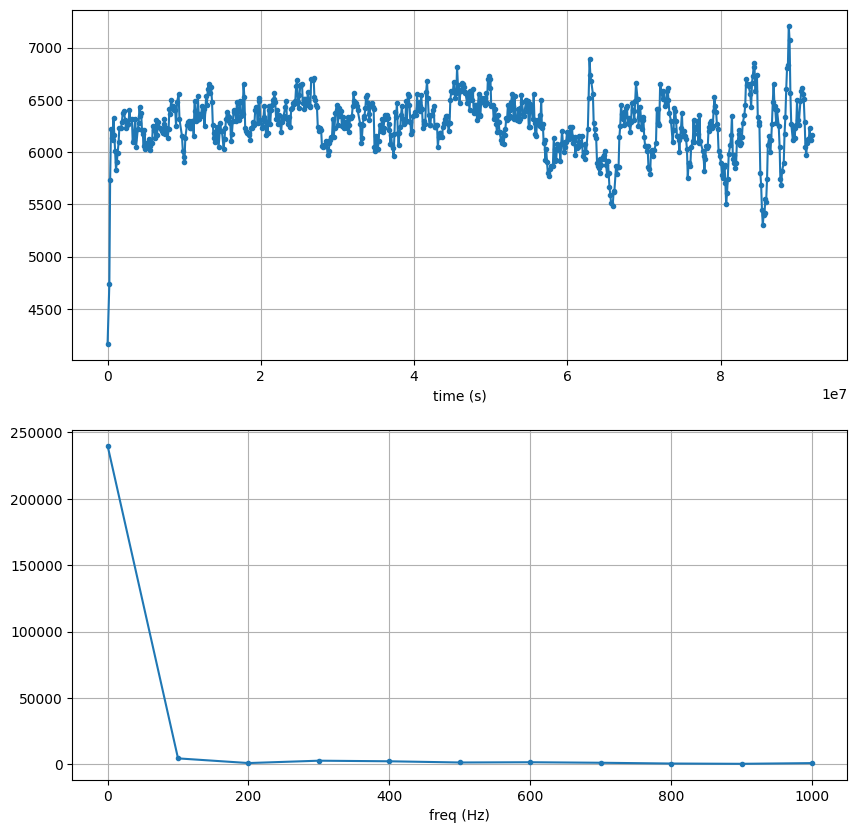

In [17]:
t = m1_fault5["TimeUS"]
y = m1_fault5["RPM"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()


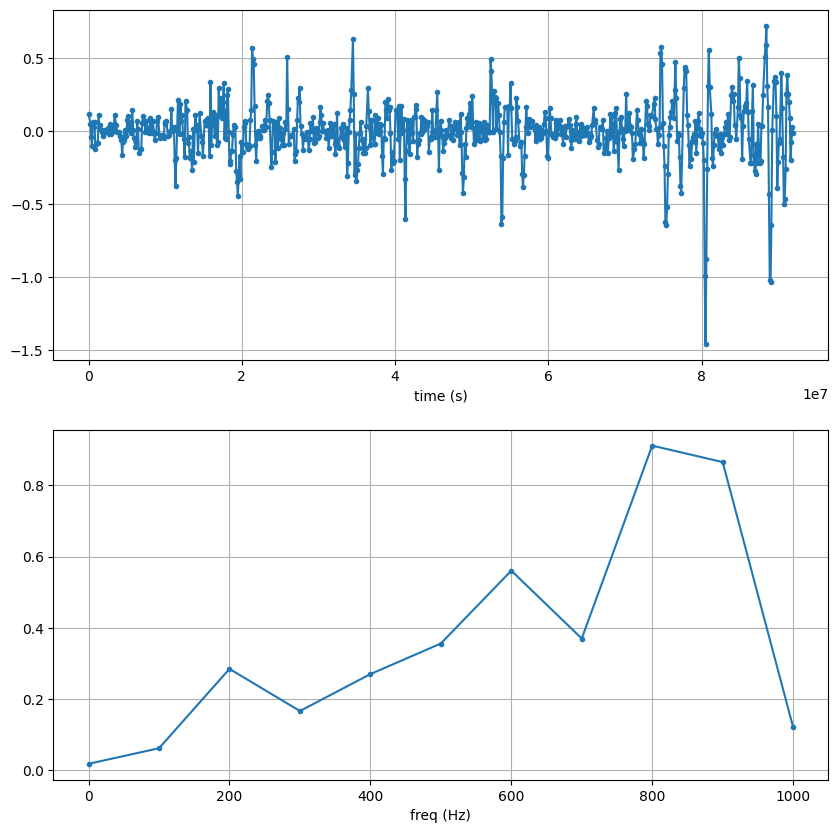

In [18]:
t = m1_fault5["TimeUS"]
y = m1_fault5["GyrX"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()


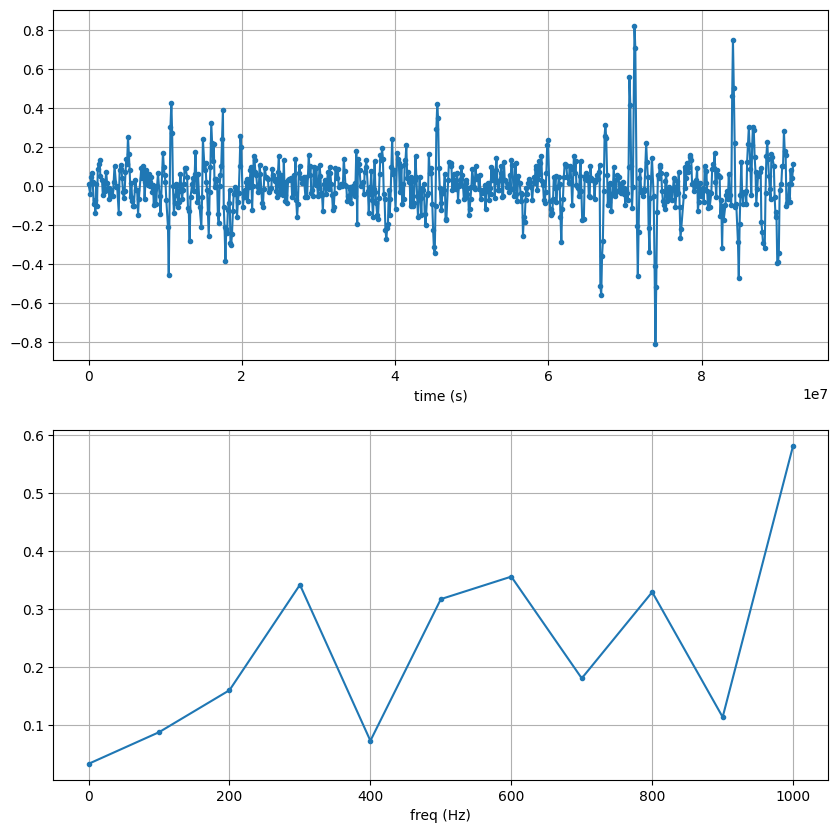

In [19]:
t = m1_fault5["TimeUS"]
y = m1_fault5["GyrY"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()


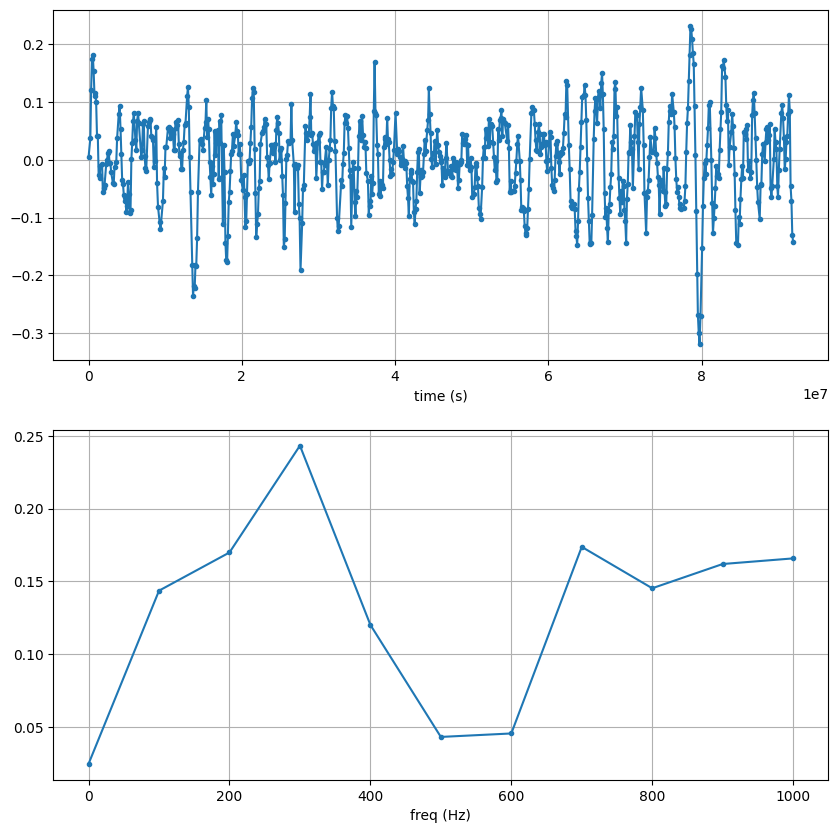

In [20]:
t = m1_fault5["TimeUS"]
y = m1_fault5["GyrZ"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()


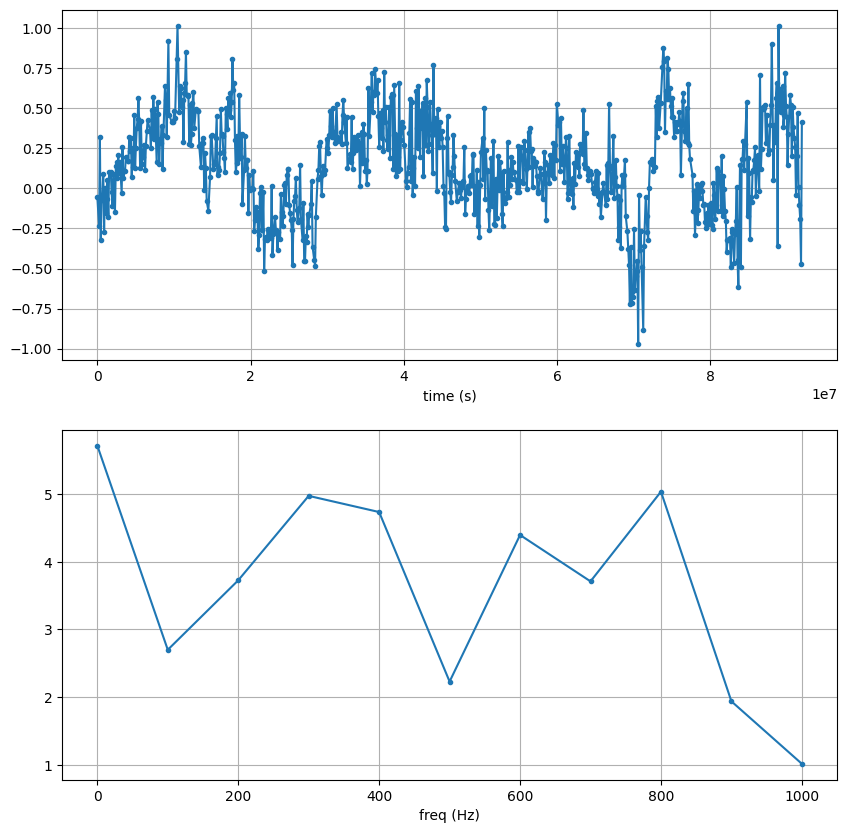

In [21]:
t = m1_fault5["TimeUS"]
y = m1_fault5["AccX"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()


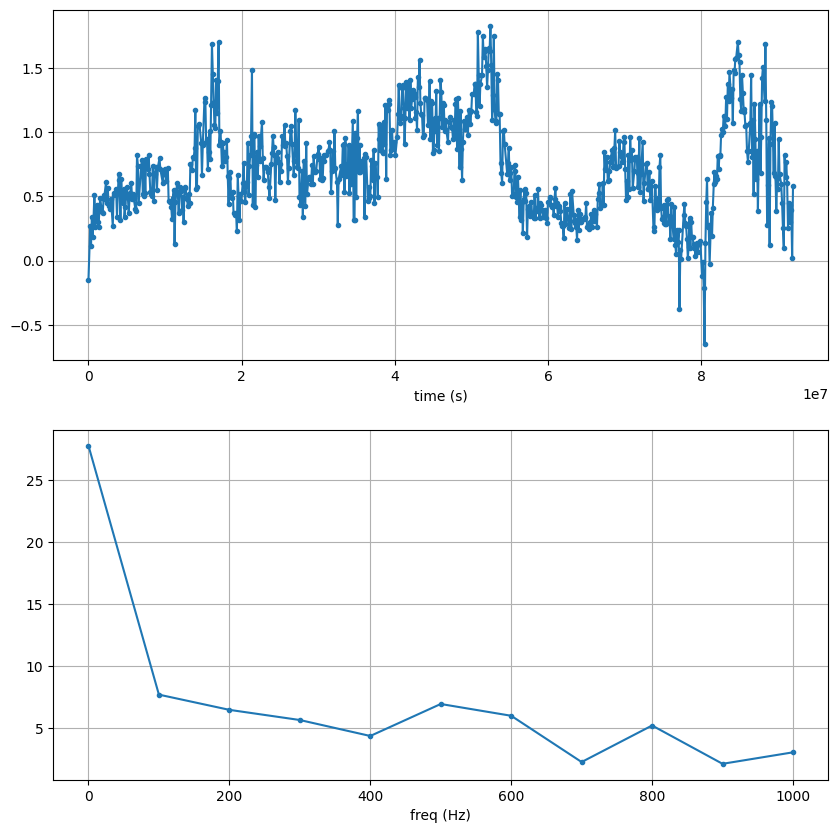

In [22]:
t = m1_fault5["TimeUS"]
y = m1_fault5["AccY"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()


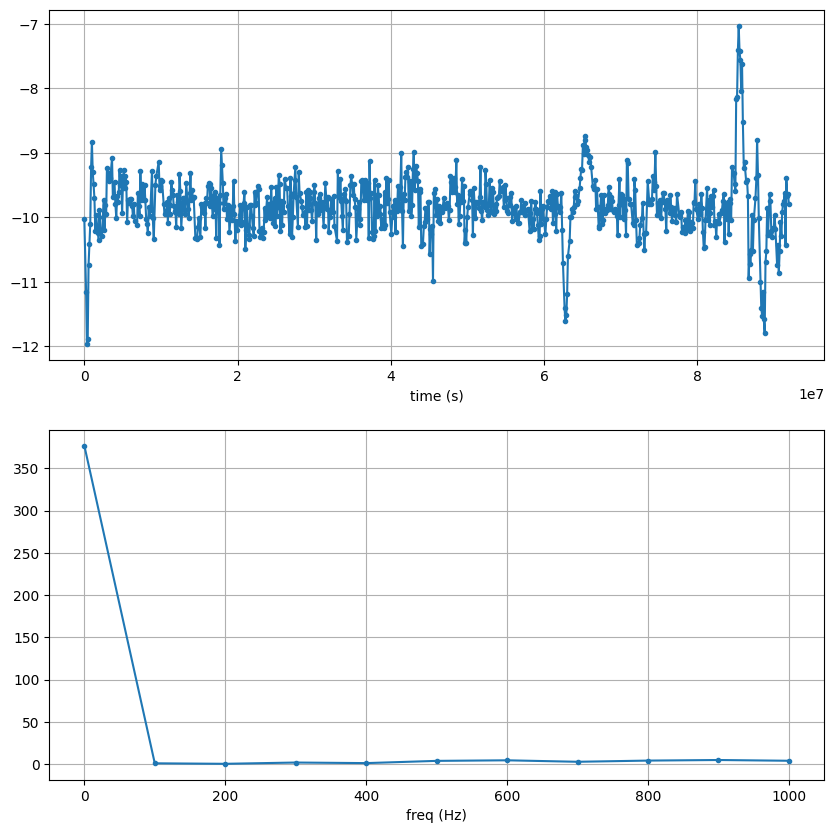

In [23]:
t = m1_fault5["TimeUS"]
y = m1_fault5["AccZ"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()
